# Speed comparison of list and nd array

### speed demonstration

In [1]:
import numpy as np

In [2]:
from time import time

a = [i for i in range(1000_00_00)]
b = [i for i in range(1000_00_00, 2000_00_00)]

start = time()
c = [a[i]+b[i] for i in range(1000_00_00)]
end = time()
print(f"time elapsed: {end-start}")

time elapsed: 1.846043586730957


In [3]:
a = np.arange(1000_00_00)
b = np.arange(1000_00_00, 2000_00_00)

start = time() # start the timer
c = a + b
end = time() # end the timer
print(f"time elapsed: {end-start}")

time elapsed: 0.20426273345947266


In [4]:
11.344172584562097/0.20426273345947266

55.53716232243054

## speed demonstration 2

In [5]:
%timeit -n 1000 [i ** 2 for i in range(10000)]

719 µs ± 87.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
%timeit -n 1000 (np.arange(10000) ** 2)

25.3 µs ± 7.28 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
719/25.3

28.41897233201581

# controlling memory space with numpy

- We can not control the size of python list.

In [9]:
import sys

In [10]:
a = [i for i in range(1000_00_00)]

In [11]:
sys.getsizeof(a)

89095160

We cannot control the size of this a variable. However, we can do the customization in numpy array.

In [12]:
a = np.arange(1000_00_00)
sys.getsizeof(a)

40000112

In [13]:
a.dtype # numpy automatically decided that it should
# use int32

dtype('int32')

# Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is broadcasted across the larger array so that they have compatible shapes.

    Rules of broadcasting
    
    1. First make the number of dimensions of both array same. This is done by appending 1 to the head of the smaller array.
       For example, if we have two arrays of shape (4, 3) and (3,), then we prepend 1 to the smaller array and make it 
       (1, 3).
      
    2. After the first step, when both the arrays have same dimension then we make all 1's equal to the non-one value of the
       second array. For example, in the above case we make (1, 3) equal to (4, 3).
       
    3. If after the steps 1 and 2, the shape of both the arrays is same, then operation is possible.

### Example 1

    - (4,3) and (3,)
    
    1. After step 1, (3, ) ---> (1, 3)
       Now we have 2 arrays (4, 3) and (1, 3)
    
    2. Now we make 1 to non-1 value of the other shape
       (1, 3) --> (4, 3)
    
    3. Now that shapes are same, we can now do the operation.

In [14]:
a = np.arange(12).reshape((4,3))
b = np.arange(3)

print(a+b) # allowed

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


## Example 2

    - (3, 4) and (3, )
    
    1. After step 1, (3, ) ---> (1, 3)
    
    2. Now we make 1 to non-1 value of the other shape
       (1, 3) ---> (3, 3)
    
    3. Now that we have done the broadcasting and still the shapes are not same,
       we cannot do the operation.

In [17]:
a = np.arange(12).reshape((3, 4))
b = np.arange(3)
try:
    print(a+b)
except ValueError as ex:
    print(ex)

operands could not be broadcast together with shapes (3,4) (3,) 


## Example 3

    - (1, 3) and (4, 1)
    
    1. Since dimensions are same, we go to step no 2.
    2. Make 1's to non-1 values of the other shapes
       (1, 3) ---> (4, 3)
       (4, 1) ---> (4, 3)
    3. Now both the arrays have same shape and thus we can do the operation.

In [20]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

try:
    print(a+b)
except ValueError as ex:
    print(ex)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


## Example 4

    - (1,) and (2,2)
    
    1. First we will make the dimensions equal, (1, ) ---> (1, 1)
    2. After making dimensions equal, we make all 1's equal to the non-1's
       of the other array.
       (1,1) ---> (2, 2)
    3. Since the shapes have come out to be same, we can now perform the
       operation.

In [22]:
a = np.array([1])
b = np.arange(4).reshape((2,2))

print(a + b)

[[1 2]
 [3 4]]


## Example 5

    - (3,4) and (4,3)
    
    1. Since we cannot do any sort of broadcasting here, hence we cannot do
       any operation bewteen them(except matrix multiplication).

In [24]:
a = np.arange(12).reshape((3,4))
b = np.arange(12).reshape((4,3))

try:
    print(a+b)
except ValueError as ex:
    print(ex)

operands could not be broadcast together with shapes (3,4) (4,3) 


## Example 6
    - (4,4) and (2,2)
    
    1. Since dimensions are same and also there is not a single 1 in the 
       shape of any shape, we cannot apply any sort of broadcasting rule.
    2. Also, shapes are also NOT equal. We cannot do any operation between 
       them.

In [27]:
a = np.arange(16).reshape((4,4))
b = np.arange(4).reshape((2,2))

try:
    print(a+b)
except ValueError as ex:
    print(ex)

operands could not be broadcast together with shapes (4,4) (2,2) 


# working with mathematical functions

In [28]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

## sigmoid

In [42]:
# import image module 
from IPython.display import Image 

image_url = "https://wikimedia.org/api/rest_v1/media/math/render/svg/faaa0c014ae28ac67db5c49b3f3e8b08415a3f2b"
Image(url=image_url, width=100, height=100) 

In [36]:
def sigmoid(arr):
    return 1 / (1 + np.exp(-arr))

In [37]:
a = np.arange(10)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

## mean squared error loss function

In [43]:
actual = np.random.randint(1, 100, (25, ))
predicted = np.random.randint(1, 100, (25, ))

In [44]:
actual

array([44,  8, 43, 12, 74, 29, 63, 38, 25, 60,  2, 66, 11, 16, 81, 28, 90,
       21, 82, 13, 44, 66, 85, 46, 75])

In [45]:
predicted

array([48, 79, 42, 76, 17, 47,  3, 80, 16, 23, 14, 22, 26, 32, 75, 38, 12,
        4, 61, 47,  4, 47, 98, 72, 78])

In [48]:
def mse(actual, predicted):
    return np.mean((actual-predicted) ** 2)

In [49]:
mse(actual, predicted)

1320.92

# missing values

    np.nan is used for missing values. It is different from None.
    None is not considered missing value. All the code of numpy has
    been written keeping in mind None as missing value.

In [50]:
a = np.array([1,2,3, np.nan, 5,6])

In [51]:
a

array([ 1.,  2.,  3., nan,  5.,  6.])

    To find out the missing value we have a vectorized top level function
    in the numpy library called as np.isnan(). This returns us a boolean
    mask which can then be used for boolean masking.

In [53]:
mask = np.isnan(a)
mask

array([False, False, False,  True, False, False])

    Now to filter out the missing values from the a, we can then pass
    this mask into the a.

In [55]:
a[~mask] # We have now filtered out the missing values

array([1., 2., 3., 5., 6.])

# plotting graph

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

## Example 1
     
     Plot the graph of y = x

In [81]:
x = np.linspace(-10, 10, 100)
y = x

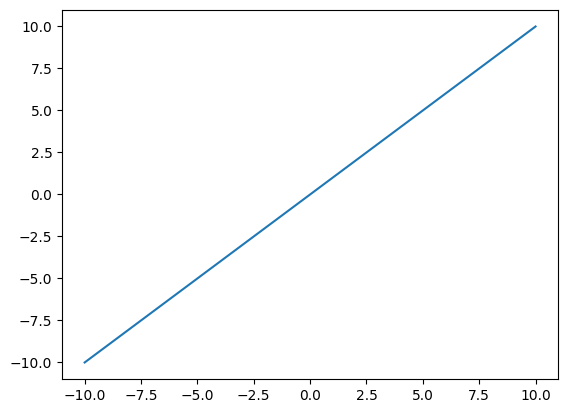

In [82]:
plt.plot(x, y)
plt.show()

## Example 2
    y = x ** 2

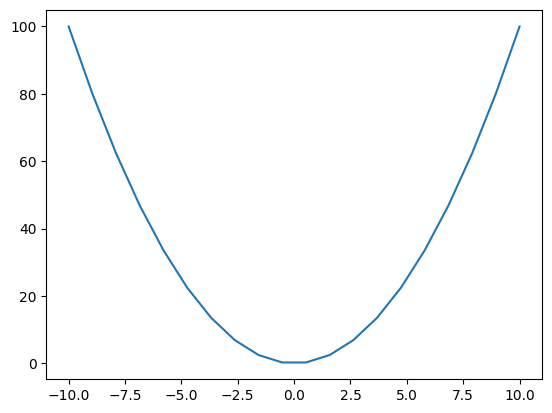

In [80]:
x = np.linspace(-10, 10, 20)
y = x ** 2

plt.plot(x,y)
plt.show()


## Example 3

    y = sin(x)

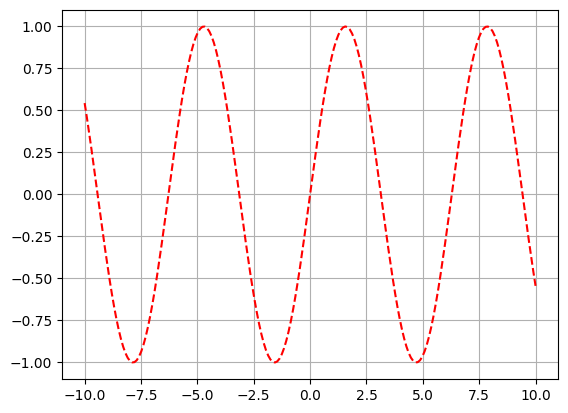

In [88]:
x = np.linspace(-10, 10, 200)
y = np.sin(x)

plt.plot(x, y, 'r--')
plt.grid()
plt.show()

## Example 4

    sigmoid function

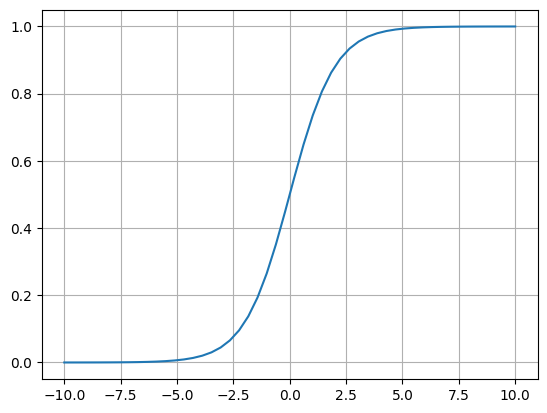

In [91]:
x = np.linspace(-10, 10, 50)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.grid()
plt.show()